<a href="https://colab.research.google.com/github/PhooPyae/my_playground/blob/main/animal_image_matting_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [IJCV-2022] Bridging Composite and Real: Towards End-to-end Deep Image Matting
<p align="justify">This is the demo of the paper <a href="https://arxiv.org/pdf/2010.16188.pdf">Bridging Composite and Real: Towards End-to-end Deep Image Matting</a> [IJCV-2021], in which we provide a novel network to perform end-to-end matting task on natural images. More information about the paper and the source code can be found in this <a href="https://www.youtube.com/watch?v=FJPm4YQOEyo&ab_channel=GFM">video demo</a> or in our <a href="https://github.com/JizhiziLi/GFM">github repo</a>.</p>

<img src="https://github.com/JizhiziLi/GFM/blob/master/demo/src/homepage/spring.gif?raw=true" width="40%"><img src="https://github.com/JizhiziLi/GFM/blob/master/demo/src/homepage/summer.gif?raw=true" width="40%">

<img src="https://github.com/JizhiziLi/GFM/blob/master/demo/src/homepage/autumn.gif?raw=true" width="40%"><img src="https://github.com/JizhiziLi/GFM/blob/master/demo/src/homepage/winter.gif?raw=true" width="40%">

<p align="justify">In this demo, we will help you generate the matting results of your own images based on one of our prtrained models step by step. You don't need the environment with GPUs, all you need is to run each code cell sequentially and upload your images. The results will automatically display on screen or be downloaded to your machine if you need. </p>

If you have any issues or encounter any problems, please feel free to raise issues in our [github repo](https://github.com/JizhiziLi/animal-matting) or contact me at [jili8515@uni.sydney.edu.au](mailto:jili8515@uni.sydney.edu.au). Enjoy!

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/pdf/2010.16188.pdf)      [![GitHub stars](https://img.shields.io/github/stars/JizhiziLi/GFM?style=social)](https://github.com/JizhiziLi/GFM)


## More relevant links
- Paper: https://arxiv.org/pdf/2010.16188.pdf
- Github Repo: https://github.com/JizhiziLi/GFM
- Publication: https://link.springer.com/article/10.1007/s11263-021-01541-0


# Prepare repository and download pretrained model

In [ ]:
!git clone https://github.com/JizhiziLi/GFM.git
!mkdir GFM/models/

Cloning into 'animal-matting'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 171 (delta 46), reused 156 (delta 32), pack-reused 0
Receiving objects: 100% (171/171), 40.73 MiB | 43.62 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
!gdown --id 1Y8dgOprcPWdUgHUPSdue0lkFAUVvW10Q -O /content/GFM/models/model_r34_2b_gfm_tt.pth

Downloading...
From: https://drive.google.com/uc?id=1Y8dgOprcPWdUgHUPSdue0lkFAUVvW10Q
To: /content/animal-matting/models/model_r34_2b_gfm_tt.pth
504MB [00:04, 122MB/s] 


# Upload your image

In [ ]:
import os
import shutil
from google.colab import files

shutil.rmtree('/content/animal-matting/samples/original/')
os.makedirs('/content/animal-matting/samples/original/')

filename = list(files.upload().keys())[0]
os.rename(filename,'/content/animal-matting/samples/original/'+filename)

Saving 5.jpg to 5.jpg


# Run the pretrained model

In [ ]:
cd /content/GFM/

/content/animal-matting


In [ ]:
!bash ./scripts/deploy_samples.sh

*********************************
Loading arch: e2e_resnet34_2b_gfm_tt
Loading model: models/model_r34_2b_gfm_tt.pth
Predict choice: 3
Test strategy: hybrid
Running on GPU with CUDA as True...
=====> Test on samples and save alpha, color results
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
100% 1/1 [00:01<00:00,  1.18s/it]


# Display results

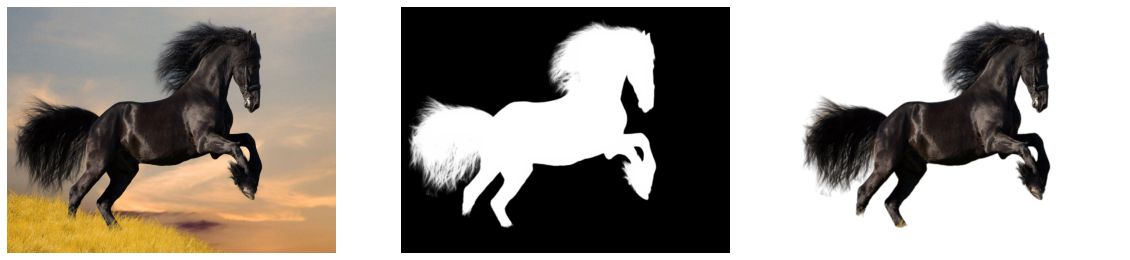

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pure_file_name = os.path.splitext(os.path.basename(filename))[0]

images = []
original_img = mpimg.imread('/content/GFM/samples/original/'+filename)
result_alpha = mpimg.imread('/content/GFM/samples/result_alpha/'+pure_file_name+'.png',0)
result_color = mpimg.imread('/content/GFM/samples/result_color/'+pure_file_name+'.png')
images.append(original_img)
images.append(result_alpha)
images.append(result_color)

plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    if i==1:
      plt.imshow(image, cmap='gray')
    else:
      plt.imshow(image)
    plt.axis('off')

# Download results if you need

In [ ]:
from google.colab import files
files.download('/content/GFM/samples/result_alpha/'+pure_file_name+'.png')
files.download('/content/GFM/samples/result_color/'+pure_file_name+'.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>